# Popular Data Science Questions
Devora Lewenstein

Data Science Stack Exchange (DSSE) is on the bottom 10 sites for stack exchange sites.  In this project we will analyize DSSE to determine what content should a data science education company create, based on interest by subject, to improve their site.

Stack Exchange websites answer questions that are practial and relevant to others.  All subjective questions should be avoided.

The sites home page subdivides into questions, tags, users, and unanswered.  The tag would be helpful to our project to determine the interests in each subject. 

We can also see from reading help that Stack Exchange sites are determined by the community which gives us some confidence using the tag system.

Looking at posted questions we can see other informative information such as the posts's score, title, author, and body.  As well we can see the last time the question was active, how many times it was viewed, and what tags are connected to it.

The tables that look most promising towards finding the most popular content is the Posts table which includes tags.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
%matplotlib inline

In [2]:
questions = pd.read_csv("C:/Users/Mark/Documents/Integralytic/2019_questions.csv", parse_dates=["CreationDate"])

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


Favourite count has missing values.  Tags column needs to be made into a list of strings.

In [4]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  8839 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(4), object(1)
memory usage: 449.0+ KB


In [5]:
questions["Tags"] = questions["Tags"].str.replace("><", ",").str.replace("<", "").str.replace(">","")

In [6]:
questions["Tags"].head(5)

0                         machine-learning,data-mining
1    machine-learning,regression,linear-regression,...
2              python,time-series,forecast,forecasting
3                    machine-learning,scikit-learn,pca
4                  dataset,bigdata,data,speech-to-text
Name: Tags, dtype: object

In [7]:
tag_count={}
for each in questions["Tags"]:
    tag_split=each.split(",")
    for a in tag_split:
        if a in tag_count:
            tag_count[a]+=1
        else:
            tag_count[a]=1
            

In [8]:
print(tag_count)

{'machine-learning': 2693, 'data-mining': 217, 'regression': 347, 'linear-regression': 175, 'regularization': 50, 'python': 1814, 'time-series': 466, 'forecast': 34, 'forecasting': 85, 'scikit-learn': 540, 'pca': 85, 'dataset': 340, 'bigdata': 95, 'data': 213, 'speech-to-text': 8, 'fuzzy-logic': 13, 'anomaly-detection': 92, 'online-learning': 13, 'matrix-factorisation': 24, 'correlation': 80, 'naive-bayes-classifier': 42, 'deep-learning': 1220, 'keras': 935, 'cnn': 489, 'theory': 11, 'gradient-descent': 98, 'nlp': 493, 'clustering': 257, 'feature-extraction': 87, 'encoding': 54, 'embeddings': 44, 'pandas': 354, 'numpy': 117, 'decision-trees': 145, 'accuracy': 89, 'matlab': 62, 'reinforcement-learning': 203, 'q-learning': 37, 'policy-gradients': 27, 'neural-network': 1055, 'image-classification': 211, 'r': 268, 'logistic-regression': 154, 'predictive-modeling': 265, 'lstm': 402, 'tensorflow': 584, 'gpu': 42, 'data-cleaning': 157, 'object-detection': 109, 'recommender-system': 103, 'supe

In [9]:
viewtag = sorted(tag_count.items(), key=lambda x:x[1], reverse=True)
viewtag

[('machine-learning', 2693),
 ('python', 1814),
 ('deep-learning', 1220),
 ('neural-network', 1055),
 ('keras', 935),
 ('classification', 685),
 ('tensorflow', 584),
 ('scikit-learn', 540),
 ('nlp', 493),
 ('cnn', 489),
 ('time-series', 466),
 ('lstm', 402),
 ('pandas', 354),
 ('regression', 347),
 ('dataset', 340),
 ('r', 268),
 ('predictive-modeling', 265),
 ('clustering', 257),
 ('statistics', 234),
 ('machine-learning-model', 224),
 ('data-mining', 217),
 ('data', 213),
 ('image-classification', 211),
 ('feature-selection', 209),
 ('reinforcement-learning', 203),
 ('data-science-model', 186),
 ('linear-regression', 175),
 ('pytorch', 175),
 ('xgboost', 165),
 ('feature-engineering', 163),
 ('loss-function', 161),
 ('random-forest', 159),
 ('data-cleaning', 157),
 ('logistic-regression', 154),
 ('rnn', 149),
 ('training', 148),
 ('decision-trees', 145),
 ('cross-validation', 139),
 ('svm', 136),
 ('multiclass-classification', 131),
 ('prediction', 128),
 ('visualization', 126),
 ('n

In [10]:
tag_view={}
for x, y in zip(questions["Tags"], questions["ViewCount"]):
    tag_split=x.split(",")
    for a in tag_split:
        if a in tag_view:
            tag_view[a]+=y
        else:
            tag_view[a]=1
            

In [11]:
print(tag_view)

{'machine-learning': 388479, 'data-mining': 31036, 'regression': 49427, 'linear-regression': 18954, 'regularization': 4917, 'python': 535935, 'time-series': 62484, 'forecast': 6503, 'forecasting': 7147, 'scikit-learn': 128056, 'pca': 6333, 'dataset': 43133, 'bigdata': 12900, 'data': 17870, 'speech-to-text': 263, 'fuzzy-logic': 982, 'anomaly-detection': 10779, 'online-learning': 1272, 'matrix-factorisation': 898, 'correlation': 9397, 'naive-bayes-classifier': 5728, 'deep-learning': 233045, 'keras': 268025, 'cnn': 69766, 'theory': 312, 'gradient-descent': 14765, 'nlp': 71278, 'clustering': 33824, 'feature-extraction': 12691, 'encoding': 18739, 'embeddings': 3951, 'pandas': 200576, 'numpy': 48556, 'decision-trees': 20436, 'accuracy': 15056, 'matlab': 6426, 'reinforcement-learning': 20054, 'q-learning': 3268, 'policy-gradients': 1382, 'neural-network': 185342, 'image-classification': 33213, 'r': 33655, 'logistic-regression': 18341, 'predictive-modeling': 16898, 'lstm': 74407, 'tensorflow':

In [12]:
viewtagview = sorted(tag_view.items(), key=lambda x:x[1], reverse=True)
viewtagview 

[('python', 535935),
 ('machine-learning', 388479),
 ('keras', 268025),
 ('deep-learning', 233045),
 ('pandas', 200576),
 ('neural-network', 185342),
 ('scikit-learn', 128056),
 ('tensorflow', 119560),
 ('classification', 104397),
 ('dataframe', 89281),
 ('lstm', 74407),
 ('nlp', 71278),
 ('cnn', 69766),
 ('time-series', 62484),
 ('regression', 49427),
 ('numpy', 48556),
 ('dataset', 43133),
 ('pytorch', 39887),
 ('csv', 38453),
 ('clustering', 33824),
 ('r', 33655),
 ('image-classification', 33213),
 ('computer-vision', 32484),
 ('seaborn', 31980),
 ('xgboost', 31457),
 ('data-mining', 31036),
 ('feature-selection', 29081),
 ('bert', 28832),
 ('data-formats', 28443),
 ('matplotlib', 25956),
 ('data-cleaning', 25751),
 ('data-science-model', 23173),
 ('machine-learning-model', 22720),
 ('loss-function', 22082),
 ('gpu', 21091),
 ('multiclass-classification', 20948),
 ('opencv', 20735),
 ('decision-trees', 20436),
 ('reinforcement-learning', 20054),
 ('cross-validation', 19474),
 ('stat

In [13]:
count_tags_used = pd.DataFrame(list (tag_count.items ()),columns = ['tag','tag_used_count'])
most_used=count_tags_used.sort_values('tag_used_count', ascending=False).head(20)
most_used

,tag,tag_used_count
0,machine-learning,2693
5,python,1814
21,deep-learning,1220
39,neural-network,1055
22,keras,935
57,classification,685
45,tensorflow,584
9,scikit-learn,540
26,nlp,493
23,cnn,489


In [14]:
count_tags_viewed = pd.DataFrame(list (tag_view.items()),columns = ['tag','tag_viewed_count'])
#count_tags_viewed.set_index("tag", drop=True, inplace=True)
most_views=count_tags_viewed.sort_values('tag_viewed_count', ascending=False).head(20)
most_views

,tag,tag_viewed_count
5,python,535935
0,machine-learning,388479
22,keras,268025
21,deep-learning,233045
31,pandas,200576
39,neural-network,185342
9,scikit-learn,128056
45,tensorflow,119560
57,classification,104397
86,dataframe,89281


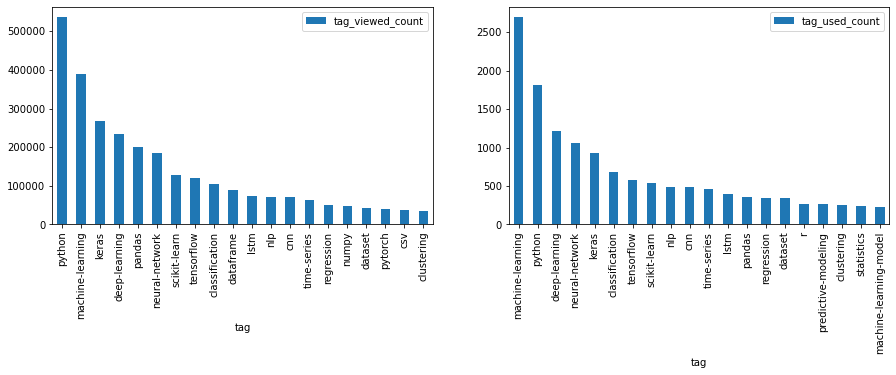

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
most_views.plot.bar(x="tag",  y="tag_viewed_count", ax=ax[0])
most_used.plot.bar(x="tag", y="tag_used_count", ax=ax[1])

In [16]:
in_used = pd.merge(most_used, most_views, how="left", left_index=True, right_index=True)
in_viewed = pd.merge(most_used, most_views, how="right", left_index=True, right_index=True)
in_used

,tag_x,tag_used_count,tag_y,tag_viewed_count
0,machine-learning,2693,machine-learning,388479.0
5,python,1814,python,535935.0
21,deep-learning,1220,deep-learning,233045.0
39,neural-network,1055,neural-network,185342.0
22,keras,935,keras,268025.0
57,classification,685,classification,104397.0
45,tensorflow,584,tensorflow,119560.0
9,scikit-learn,540,scikit-learn,128056.0
26,nlp,493,nlp,71278.0
23,cnn,489,cnn,69766.0


In [17]:
in_viewed

,tag_x,tag_used_count,tag_y,tag_viewed_count
5,python,1814.0,python,535935
0,machine-learning,2693.0,machine-learning,388479
22,keras,935.0,keras,268025
21,deep-learning,1220.0,deep-learning,233045
31,pandas,354.0,pandas,200576
39,neural-network,1055.0,neural-network,185342
9,scikit-learn,540.0,scikit-learn,128056
45,tensorflow,584.0,tensorflow,119560
57,classification,685.0,classification,104397
86,NaN,NaN,dataframe,89281


One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together. Let's do this.

In [18]:
all_tags = list(tag_count)

In [19]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,data-mining,regression,linear-regression
machine-learning,NaN,NaN,NaN,NaN
data-mining,NaN,NaN,NaN,NaN
regression,NaN,NaN,NaN,NaN
linear-regression,NaN,NaN,NaN,NaN


In [20]:
associations.fillna(0, inplace=True)
for tags in questions["Tags"]:
    tag=tags.split(",")
    associations.loc[tag, tag] += 1


In [21]:
tag_count1 = pd.DataFrame.from_dict(tag_count, orient="index")
tag_count1.rename(columns={0: "Count"}, inplace=True)
tag_count1.head(10)

most_used1 = tag_count1.sort_values(by="Count").tail(20)
most_used1

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


In [22]:
relations_most_used = associations.loc[most_used1.index, most_used1.index]
relations_most_used 

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


In [23]:
def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning-model,statistics,clustering,predictive-modeling,r,dataset,regression,pandas,lstm,time-series,cnn,nlp,scikit-learn,tensorflow,classification,keras,neural-network,deep-learning,python,machine-learning
machine-learning-model,224,3,3,21,7,12,8,4,5,7,4,4,18,9,21,17,10,19,37,139
statistics,3,234,3,16,16,17,16,3,1,22,1,3,6,0,19,3,11,12,35,89
clustering,3,3,257,0,16,5,2,5,3,20,0,9,24,0,12,0,8,2,45,61
predictive-modeling,21,16,0,265,13,7,28,4,13,31,6,1,12,6,27,11,13,32,35,123
r,7,16,16,13,268,6,10,2,3,22,2,4,1,1,10,10,9,5,24,63
dataset,12,17,5,7,6,340,6,14,7,6,11,11,9,9,28,13,20,32,53,99
regression,8,16,2,28,10,6,347,6,11,24,6,2,37,9,34,31,42,21,59,119
pandas,4,3,5,4,2,14,6,354,7,19,1,3,37,3,3,3,1,1,244,62
lstm,5,1,3,13,3,7,11,7,402,87,24,19,2,43,20,133,69,103,61,71
time-series,7,22,20,31,22,6,24,19,87,466,8,0,12,9,25,51,33,44,105,131


In [24]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = np.NaN

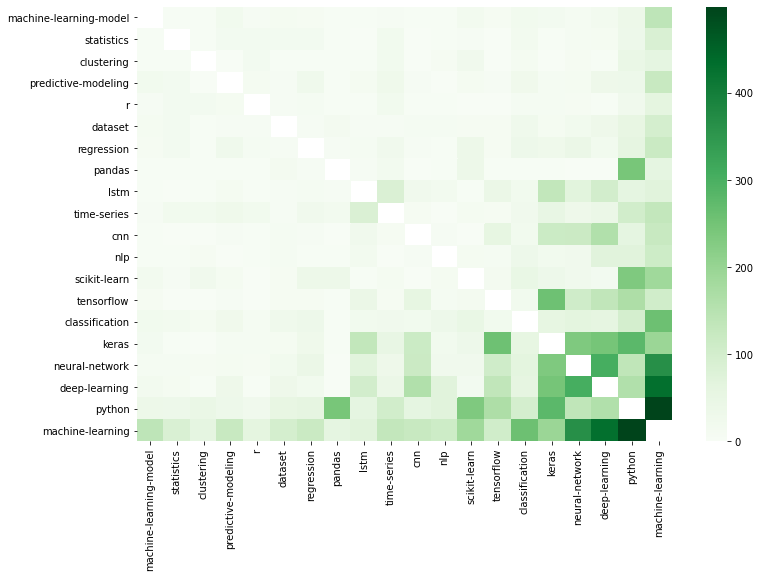

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

This attempt has a few shortcomings:  
The most used tags seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

They way we woudl work out both these problems is through a powerful data mining technique called association rules. Association rules allow us to analytically spot relations.  Although I do no know how to apply this rule now, if need be this technique can be researched and applied.

### At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.  Let us compare deep learning to all other questions posted.

In [26]:
all_question=pd.read_csv('C:/Users/Mark/Documents/Integralytic/all_questions.csv', parse_dates=["CreationDate"])

In [27]:
all_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            21576 non-null  int64         
 1   CreationDate  21576 non-null  datetime64[ns]
 2   Tags          21576 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [28]:
all_question.head(5)

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,<python><keras><tensorflow><cnn><probability>
1,45418,2019-02-12 00:50:39,<neural-network>
2,45422,2019-02-12 04:40:51,<python><ibm-watson><chatbot>
3,45426,2019-02-12 04:51:49,<keras>
4,45427,2019-02-12 05:08:24,<r><predictive-modeling><machine-learning-mode...


In [29]:
all_question["Tags"] = all_question["Tags"].str.replace("^<|>$", "").str.split("><")

In [30]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [31]:
all_question["DeepLearning"] = all_question["Tags"].apply(class_deep_learning)

In [32]:
all_question["DeepLearning"].value_counts()

0    13758
1     7818
Name: DeepLearning, dtype: int64

In [33]:
all_question=all_question[all_question["CreationDate"].dt.year < 2020]

In [34]:
all_question["quarterly"]=pd.to_datetime(all_question["CreationDate"]).dt.to_period('Q')
all_question["quarterly"]

0        2019Q1
1        2019Q1
2        2019Q1
3        2019Q1
4        2019Q1
          ...  
21571    2018Q3
21572    2018Q3
21573    2018Q3
21574    2018Q3
21575    2018Q3
Name: quarterly, Length: 21117, dtype: period[Q-DEC]

In [35]:
quarterly = all_question.groupby('quarterly').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DL-Questions', 'Total-Q']
quarterly["DL-Ratio"] = round(quarterly["DL-Questions"]/quarterly["Total-Q"], 2)
quarterly

,DL-Questions,Total-Q,DL-Ratio
quarterly,,,
2014Q2,9,157,0.06
2014Q3,13,189,0.07
2014Q4,21,216,0.10
2015Q1,18,190,0.09
2015Q2,28,284,0.10
2015Q3,45,311,0.14
2015Q4,66,382,0.17
2016Q1,110,516,0.21
2016Q2,109,518,0.21


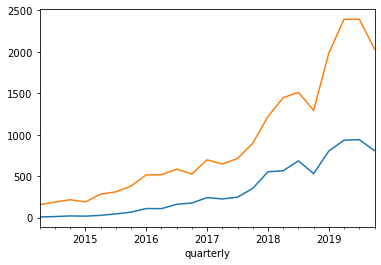

In [36]:
quarterly['DL-Questions'].sort_index().plot()
quarterly['Total-Q'].sort_index().plot()

It seems that deep learning questions was a high-growth trend since the start of DSSE. As well it is interesting to note how the third fourth quarter of the year has lower questions.  This seems to coincide with the end of school year as well as vacation season.  There is no evidence to suggest that interest in deep learning is decreasing and so we maintain our previous idea of proposing that we create deep learning content.